# Install and Import the libraries

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=UserWarning)

# Data Manipulation libraries
import pandas as pd
import numpy as np

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Estimators and metrics

from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,roc_curve,auc,roc_auc_score,accuracy_score

# NLP libraries
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec,KeyedVectors
from wordcloud import WordCloud

import re
import pickle

from tqdm import tqdm
from collections import Counter
from scipy.sparse import hstack
#Code Reference: https://ptable.readthedocs.io/en/latest/tutorial.html
from prettytable import PrettyTable

from sklearn.tree import export_graphviz
import graphviz


In [2]:
# Read the data into Pandas Dataframe

project_data= pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print('Number of data points in the  Train dataset :',project_data.shape[0])
print("-"*53)
print('Number of features in the Train dataset :',project_data.shape[1])
print("-"*53)
print("List of Features in the Train dataset:\n",project_data.columns.values.tolist())

Number of data points in the  Train dataset : 109248
-----------------------------------------------------
Number of features in the Train dataset : 17
-----------------------------------------------------
List of Features in the Train dataset:
 ['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state', 'project_submitted_datetime', 'project_grade_category', 'project_subject_categories', 'project_subject_subcategories', 'project_title', 'project_essay_1', 'project_essay_2', 'project_essay_3', 'project_essay_4', 'project_resource_summary', 'teacher_number_of_previously_posted_projects', 'project_is_approved']


In [4]:
print('Number of data points in the  Resourse dataset :',resource_data.shape[0])
print("-"*55)
print('Number of features in the Resourse dataset :',resource_data.shape[1])
print("-"*55)
print("List of Features in the Resourse dataset:",resource_data.columns.values.tolist())

Number of data points in the  Resourse dataset : 1541272
-------------------------------------------------------
Number of features in the Resourse dataset : 4
-------------------------------------------------------
List of Features in the Resourse dataset: ['id', 'description', 'quantity', 'price']


In [5]:
cols=['Date' if each_col=='project_submitted_datetime' else each_col for each_col in project_data.columns.values.tolist()] 

project_data['Date']=pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime',axis=1,inplace=True)
project_data.sort_values(by=['Date'],inplace=True)

In [6]:
project_data=project_data[cols]

print("Sample records from  Training data ")
project_data.head()

Sample records from  Training data 


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1
51140,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,Grades PreK-2,Literacy & Language,Literacy,Mobile Learning with a Mobile Listening Center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,By having a mobile listening and storage cente...,A mobile listening center will help keep equip...,My students need a mobile listening center to ...,10,1
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Applied Learning,Early Development,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,1
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Literacy & Language,Literacy,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,1


In [7]:
print("Sample records from  Resourse data ")
resource_data.head()

Sample records from  Resourse data 


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


#  Data Analysis

In [8]:
def check_class_bal(dataset,target_class):
    count_per_class=list(dataset[target_class].value_counts())
    classes=list(dataset[target_class].value_counts().index)
    
    print("Ratio of the classes :")
    
    for each_cls,cls_count in zip(classes,count_per_class):
        print("Class {} has {} records with a ratio of {}%".
              format(each_cls,cls_count,np.round((cls_count/dataset.shape[0]*100),2)))
        
    plt.bar(classes,count_per_class,color=['b','r'])
    plt.xticks(classes)
    plt.ylabel("Count")
    plt.xlabel("Classes")
    plt.title("Plot for Data Imbalance")
    plt.show()
    
    del classes
    del count_per_class

Ratio of the classes :
Class 1 has 92706 records with a ratio of 84.86%
Class 0 has 16542 records with a ratio of 15.14%


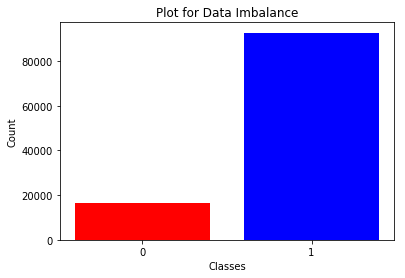

In [9]:
check_class_bal(project_data,'project_is_approved')

# Data Preprocessing

## chek for null values

In [10]:
print("Null values from Train data :\n")
print(project_data.isnull().sum())

Null values from Train data :

Unnamed: 0                                           0
id                                                   0
teacher_id                                           0
teacher_prefix                                       3
school_state                                         0
Date                                                 0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105490
project_essay_4                                 105490
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
dtype: int64


In [11]:
project_data['teacher_prefix'].fillna(method='ffill',inplace=True)

In [12]:
project_data['essay']=project_data.project_essay_1.map(str)+\
project_data.project_essay_2.map(str)+\
project_data.project_essay_3.map(str)+\
project_data.project_essay_4.map(str)


In [13]:
project_data.drop(columns=['project_essay_1','project_essay_2',
                           'project_essay_3','project_essay_4'],axis=1,inplace=True)

In [14]:
project_data.isnull().sum()

Unnamed: 0                                      0
id                                              0
teacher_id                                      0
teacher_prefix                                  0
school_state                                    0
Date                                            0
project_grade_category                          0
project_subject_categories                      0
project_subject_subcategories                   0
project_title                                   0
project_resource_summary                        0
teacher_number_of_previously_posted_projects    0
project_is_approved                             0
essay                                           0
dtype: int64

In [15]:
print("Null values from Train data :\n")
print(resource_data.isnull().sum())


Null values from Train data :

id               0
description    292
quantity         0
price            0
dtype: int64


In [16]:
resource_data['description'].fillna(method='ffill',inplace=True)

In [17]:
resource_data.isnull().sum()

id             0
description    0
quantity       0
price          0
dtype: int64

## Text Pre-processing

In [18]:
def processed_list(list_elements):
    processed_list=[]
    for i in list_elements:
        temp=''
        for j in i.split(','):
            if 'The' in j.split():
                j=j.replace('The','')
            j=j.replace(' ','')
            temp+=j.strip()+' '
            temp=temp.replace('&','_')
        processed_list.append(temp.strip())
    return processed_list

In [19]:
def get_sorted_dic(col):
    my_Counter=Counter() 
    for word in list(project_data[col]):
        my_Counter.update(word.split())   
    count_dict=dict(my_Counter)
    return dict(sorted(count_dict.items(),key=lambda x: x[1]))
    

### project_subject_categories

In [20]:
clean_categories=processed_list(list(project_data['project_subject_categories']))
project_data['clean_categories']=clean_categories
project_data.drop(['project_subject_categories'],axis=1,inplace=True)
sorted_cat_dict=get_sorted_dic('clean_categories')

### project_subject_subcategories

In [21]:
clean_sub_categories=processed_list(list(project_data['project_subject_subcategories']))
project_data['clean_sub_categories']=clean_sub_categories
project_data.drop(['project_subject_subcategories'],axis=1,inplace=True)
sorted_subcat_dict=get_sorted_dic('clean_sub_categories')

### essay

In [22]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [23]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [24]:
def text_processing(dataset,feature_name):
    processed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(dataset[feature_name].values):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        processed_text.append(sent.lower().strip())
    return processed_text

In [25]:
project_data['essay']=text_processing(project_data,'essay')

100%|██████████| 109248/109248 [01:08<00:00, 1595.45it/s]


### project_title

In [26]:
project_data['project_title']=text_processing(project_data,'project_title')

100%|██████████| 109248/109248 [00:02<00:00, 36816.93it/s]


### project_resource_summary

In [27]:
project_data['project_resource_summary']=text_processing(project_data,'project_resource_summary')

100%|██████████| 109248/109248 [00:07<00:00, 15442.24it/s]


### project_grade_category

In [28]:
processed_grade=[]

for each_grade in tqdm(project_data['project_grade_category'].values):
    temp=""
    temp=each_grade.lower()
    temp=temp.replace(' ','_')
    temp=temp.replace('-','_')
    processed_grade.append(temp)
    
project_data['project_grade_category']=processed_grade

100%|██████████| 109248/109248 [00:00<00:00, 947278.24it/s]


In [29]:
# Merge the projectdata and pricedata by using id feature

price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [30]:
print("Final Feature Names:\n\n", list(project_data.columns))
print("\nSample Data set")
project_data.head()

Final Feature Names:

 ['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state', 'Date', 'project_grade_category', 'project_title', 'project_resource_summary', 'teacher_number_of_previously_posted_projects', 'project_is_approved', 'essay', 'clean_categories', 'clean_sub_categories', 'price', 'quantity']

Sample Data set


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay,clean_categories,clean_sub_categories,price,quantity
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,grades_prek_2,engineering steam primary classroom,students need stem kits learn critical science...,53,1,fortunate enough use fairy tale stem kits clas...,Math_Science,AppliedSciences Health_LifeScience,725.05,4
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,grades_3_5,sensory tools focus,students need boogie boards quiet sensory brea...,4,1,imagine 8 9 years old third grade classroom se...,SpecialNeeds,SpecialNeeds,213.03,8
2,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,grades_prek_2,mobile learning mobile listening center,students need mobile listening center able enh...,10,1,class 24 students comes diverse learners stude...,Literacy_Language,Literacy,329.00,1
3,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,grades_prek_2,flexible seating flexible learning,students need flexible seating classroom choos...,2,1,recently read article giving students choice l...,AppliedLearning,EarlyDevelopment,481.04,9
4,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,grades_3_5,going deep art inner thinking,students need copies new york times best selle...,2,1,students crave challenge eat obstacles breakfa...,Literacy_Language,Literacy,17.74,14


In [31]:
y = project_data['project_is_approved'].values
X=project_data.drop(['project_is_approved'], axis=1)
project_data.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay,clean_categories,clean_sub_categories,price,quantity
0,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,grades_prek_2,engineering steam primary classroom,students need stem kits learn critical science...,53,1,fortunate enough use fairy tale stem kits clas...,Math_Science,AppliedSciences Health_LifeScience,725.05,4
1,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,grades_3_5,sensory tools focus,students need boogie boards quiet sensory brea...,4,1,imagine 8 9 years old third grade classroom se...,SpecialNeeds,SpecialNeeds,213.03,8
2,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,grades_prek_2,mobile learning mobile listening center,students need mobile listening center able enh...,10,1,class 24 students comes diverse learners stude...,Literacy_Language,Literacy,329.00,1


In [32]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

In [33]:
print("Training data set shape:",X_train.shape)
print("Test data set shape:",X_test.shape)

Training data set shape: (76473, 15)
Test data set shape: (32775, 15)


## Feature Vectorization

In [34]:
features=tuple()

### teacher_prefix

In [35]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.teacher_prefix.values)
X_tr_teacher_onehot=vectorizer.transform(X_train.teacher_prefix.values)
X_te_teacher_onehot=vectorizer.transform(X_test.teacher_prefix.values)

features=tuple(vectorizer.get_feature_names())

###  school_state

In [36]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.school_state.values)
X_tr_school_onehot=vectorizer.transform(X_train.school_state.values)
X_te_school_onehot=vectorizer.transform(X_test.school_state.values)

features=features+tuple(vectorizer.get_feature_names())

### project_grade_category

In [37]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.project_grade_category.values)
X_tr_grade_onehot=vectorizer.transform(X_train.project_grade_category.values)
X_te_grade_onehot=vectorizer.transform(X_test.project_grade_category.values)

features=features+tuple(vectorizer.get_feature_names())

###  clean_categories

In [38]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.clean_categories.values)
X_tr_cat_onehot=vectorizer.transform(X_train.clean_categories.values)
X_te_cat_onehot=vectorizer.transform(X_test.clean_categories.values)

features=features+tuple(vectorizer.get_feature_names())

### clean_sub_categories

In [39]:
vectorizer=CountVectorizer()
vectorizer.fit(X_train.clean_sub_categories.values)
X_tr_sub_cat_onehot=vectorizer.transform(X_train.clean_sub_categories.values)
X_te_sub_cat_onehot=vectorizer.transform(X_test.clean_sub_categories.values)

features=features+tuple(vectorizer.get_feature_names())

## Normalization

### price

In [40]:
nrml= Normalizer()
nrml.fit(X_train['price'].values.reshape(1,-1))

X_tr_price_nrml = nrml.transform(X_train.price.values.reshape(1,-1)).reshape(-1,1)
X_te_price_nrml = nrml.transform(X_test.price.values.reshape(1,-1)).reshape(-1,1)

features=list(features)
features.append('price')

### teacher_number_of_previously_posted_projects

In [41]:
nrml = Normalizer()
nrml.fit(X_train.teacher_number_of_previously_posted_projects.values.reshape(1,-1))
X_tr_teacher_number_nrml = nrml.transform(X_train.teacher_number_of_previously_posted_projects.values.reshape(1,-1)).reshape(-1,1)
X_te_teacher_number_nrml = nrml.transform(X_test.teacher_number_of_previously_posted_projects.values.reshape(1,-1)).reshape(-1,1)


features.append('teacher_number_of_previously_posted_projects')

In [42]:
X_tr_vec=hstack((X_tr_teacher_onehot,X_tr_school_onehot,X_tr_grade_onehot,X_tr_cat_onehot,
                 X_tr_sub_cat_onehot,X_tr_price_nrml,X_tr_teacher_number_nrml)).tocsr()
X_te_vec=hstack((X_te_teacher_onehot,X_te_school_onehot,X_te_grade_onehot,X_te_cat_onehot, X_te_sub_cat_onehot,
                 X_te_price_nrml,X_te_teacher_number_nrml)).tocsr()

In [43]:
print("After stacking :")
print("Training data set shape :",X_tr_vec.shape)
print("Test data set shape :",X_te_vec.shape)

After stacking :
Training data set shape : (76473, 101)
Test data set shape : (32775, 101)


#  Model Training

## Hypertuning Values

In [44]:
model=DecisionTreeClassifier()

In [45]:
print(" Default Model:\n",model)

 Default Model:
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [46]:
# Avoid the bais towards the class which has more number of observations
model.class_weight='balanced'

In [47]:
hyper_param={'max_depth':[1,5,10,50,100,500],'min_samples_split':[5,10,100,500]}

In [48]:
def grid_search(model,hyper_param,X_train,y_train,X_test,y_test):
    max_depth_len=len(hyper_param['max_depth'])
    min_split_len=len(hyper_param['min_samples_split'])
    reshape_size=(max_depth_len,min_split_len)
        
    clf= GridSearchCV(model, hyper_param, cv=3, scoring='roc_auc',return_train_score=True,verbose=1,n_jobs=-1)
    clf.fit(X_train, y_train)
    
    #code ref:https://www.kaggle.com/jinilcs/grid-search-to-find-best-tuning-parameters
    results_df = pd.DataFrame(clf.cv_results_)
    auc_scores=[np.array(results_df.mean_train_score).reshape(reshape_size),
                np.array(results_df.mean_test_score).reshape(reshape_size)]
    
    titles=["Train dataset","CV dataset"]
    fig,plots= plt.subplots(1,2,figsize=(14,5))
    fig.suptitle("AUC scores for Train and CV datasets".upper())
    
    for i in range(2):
        sns.heatmap(auc_scores[i],yticklabels=hyper_param['max_depth'],
                    xticklabels=hyper_param['min_samples_split'],cmap="YlGnBu",annot=True,fmt='f',ax=plots[i])
        plots[i].set_title('{} Auc scores'.format(titles[i]).upper())
        plots[i].set(ylabel='max_depth', xlabel='min_samples_split')
        plots[i].label_outer()
        
    plt.show()
    
    print("Best Parameters are:",clf.best_params_ )
    
    return build_best_model_plot_roc(clf.best_estimator_,X_train,y_train,X_test,y_test)

In [49]:
def cross_validate_scores(model,hyper_param,X_train,y_train,X_test,y_test):
    #declaring the variables
    scores=dict()
    optimal_params=dict()
    best_test_score=0.0
    
    #assigning the parameter values
    depth_values=sorted(hyper_param['max_depth'])
    split_values=sorted(hyper_param['min_samples_split'])
    reshape_size=(len(split_values),len(depth_values))
    
    #default Model
    clf=DecisionTreeClassifier(class_weight='balanced')

    for depth in tqdm(depth_values):
        clf.max_depth=depth
        scores[depth]=dict()
        
        for split in split_values:
            clf.min_samples_split=split
            
            #run crossvalidate and stores scores into cv_scores
            cv_scores=cross_validate(clf,X_train,y_train,cv=3,scoring='roc_auc',return_train_score=True,n_jobs=-1)
            scores[depth][split]=[cv_scores['train_score'].mean(),cv_scores['test_score'].mean()]
            
            #pick the best optimal parameters
            if(cv_scores['test_score'].mean() >= best_test_score):
                optimal_params['max_depth']=depth
                optimal_params['min_samples_split']=split
                optimal_params['best_score']=np.round(cv_scores['test_score'].mean(),4)
                best_test_score=optimal_params['best_score']
                
    print(optimal_params)

    titles=["Train dataset","CV dataset"]
    fig,plots= plt.subplots(1,2,figsize=(16,6))
    fig.suptitle("AUC scores for Train and CV datasets".upper())
    
    #plot the auc scores of train and cv datasets throught the heatmap
    for i in range(2):
        heatmap_data=np.zeros(reshape_size,dtype=float)
        for row,split in enumerate(split_values):
            for col, depth in enumerate(depth_values):
                heatmap_data[row,col]=np.round(scores[depth][split][i],5)
        sns.heatmap(heatmap_data,
            xticklabels=depth_values,yticklabels=split_values,cmap="YlGnBu",annot=True,fmt='f',ax=plots[i])
        plots[i].set_title('{} Auc scores'.format(titles[i]).upper())
        plots[i].set(xlabel='max_depth', ylabel='min_samples_split')
        plots[i].label_outer()  
    plt.show()
    
    #assign the bestparameter values to model
    clf.max_depth=optimal_params['max_depth']
    clf.min_samples_split=optimal_params['min_samples_split']
    
    del depth_values
    del split_values
    del reshape_size
    del titles
    del scores
    del best_test_score
    del optimal_params
    
    return build_best_model_plot_roc(clf,X_train,y_train,X_test,y_test)

In [50]:
def build_best_model_plot_roc(model,X_train,y_train,X_test,y_test):
    
  
    model.fit(X_train,y_train)
    
    y_tr_prob=model.predict_proba(X_train)[:,1]
    y_te_prob=model.predict_proba(X_test)[:,1]
    
    predi_prob=[y_tr_prob,y_te_prob]
    
    return plot_roc(predi_prob,y_train,y_test)
    

In [51]:
def plot_roc(predi_prob,y_train,y_test):
    
    fpr_tr,tpr_tr,thr_tr=roc_curve(y_train,predi_prob[0])
    fpr_te,tpr_te,thr_te=roc_curve(y_test,predi_prob[1])
    
    plt.plot(fpr_tr,tpr_tr,label="AUC score for Train data is : {}".format(np.round(auc(fpr_tr,tpr_tr),4)))
    plt.plot(fpr_te,tpr_te,label="AUC score is Test data is  : {}".format(np.round(auc(fpr_te,tpr_te),4)))
    plt.plot([0,1],[0,1],'k--',label="Random Curve AUC score is :{}".format(0.5))

    plt.title("ROC Curve for Train and Test data")
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()
    
    print('-'*90)
    cutoof_thr=thr_tr[np.argmax(tpr_tr*(1-fpr_tr))] 
    print("The Maximum value of 'TPR*(1-FPR)' is {} for 'THRESHOLD VALUE'of {}"
          .format(max(tpr_tr*(1-fpr_tr)),np.round(cutoof_thr,3)))
    print('-'*90)
    
    y_train_pred=[1 if val >= cutoof_thr else 0 for val  in predi_prob[0]]
    y_test_pred=[1 if val >= cutoof_thr else 0 for val  in predi_prob[1]]
    
    
    predictions=[y_train_pred,y_test_pred]
    
    print("Confusion matrix for train and test datasets".upper())
    plot_confusion_matrix(predictions,y_train,y_test)
    
    return find_indices_for_fp(y_train,predictions[0])+find_indices_for_fp(y_test,predictions[1])
    

In [52]:
def find_indices_for_fp(y_true,y_pred):
    indices=[]
    count=0
    for y_hat,y in zip(y_pred,y_true):
        if(y_hat==1 and y==0):
            indices.append(count)
        count=count+1
    return indices

In [53]:
def plot_confusion_matrix(predictions,y_train,y_test):
    fig = plt.figure(figsize = (11,3),constrained_layout=True) 
    ax1 = fig.add_subplot(121) 
    ax2 = fig.add_subplot(122)
    
    ax1.set_title("Train data")
    sns.heatmap(confusion_matrix(y_train,predictions[0]), 
                            annot=True, fmt="d",cmap="YlGnBu",ax=ax1,cbar=False)
    
    ax2.set_title("Test data ")
    sns.heatmap(confusion_matrix(y_test,predictions[1]), 
                            annot=True, fmt="d",cmap="YlGnBu",ax=ax2,cbar=False)
    
    #print the Accuracy
    acc_table=PrettyTable()
    acc_table.field_names = ["Training Accuracy","Test Accuracy"]
    acc_table.add_row([np.round(accuracy_score(y_train,predictions[0]),3),
                       np.round(accuracy_score(y_test,predictions[1]),3)])
    print(acc_table)

In [54]:
def false_positive_plots(fp_indices,project_data):
    
    display_words=''

    data=project_data['essay'][fp_indices]
    for sentence in data: 
        for word in sentence.split(): 
            display_words = display_words + word + ' '
        
    wordcloud = WordCloud(width = 500, height = 450,background_color ='white', min_font_size = 6).generate(display_words)
    plt.figure(figsize=(15,8),constrained_layout=True)
    plt.title("Words predicted as  False Positive from Train and Test datasets".upper())
    plt.imshow(wordcloud,interpolation="bilinear") 
    plt.axis("off")
 
    plt.figure(constrained_layout=True)
    plt.boxplot(project_data.price[fp_indices])
    plt.title("Prices predicted as False Positive from Train and Test datasets")
    plt.ylabel("Price")

    plt.figure(constrained_layout=True)
    sns.distplot(project_data.teacher_number_of_previously_posted_projects[fp_indices],hist=False,kde=True, 
                 kde_kws={'linewidth': 3},label = 'FP')
    plt.title("False Positive from Train and Test datasets")
    plt.ylabel("Price")
    plt.show()

In [55]:
def visualize_tree(model,X_train,y_train,feature_names):
    model.fit(X_train,y_train)
    export_graphviz(model, out_file="tree.dot", class_names=["0", "1"],max_depth=2,
    feature_names=feature_names, impurity=False, filled=True)
    with open("tree.dot") as f:
        dot_graph = f.read()
    display(graphviz.Source(dot_graph))

# TASK-1

## Bag Of Words

###  project_title

In [56]:
bow_features=tuple()

In [57]:
vectorizer=CountVectorizer(ngram_range=(1,2),max_features=5000,min_df=10)
vectorizer.fit(X_train.project_title.values)
X_tr_title=vectorizer.transform(X_train.project_title.values)
X_te_title=vectorizer.transform(X_test.project_title.values)
bow_features=tuple(features)+tuple(vectorizer.get_feature_names())

### essay

In [58]:
vectorizer=CountVectorizer(ngram_range=(1,2),max_features=5000,min_df=10)
vectorizer.fit(X_train.essay.values)
X_tr_essay=vectorizer.transform(X_train.essay.values)
X_te_essay=vectorizer.transform(X_test.essay.values)

bow_features=bow_features+tuple(vectorizer.get_feature_names())

###  project_resource_summary

In [59]:
vectorizer=CountVectorizer(ngram_range=(1,2),max_features=5000,min_df=10)
vectorizer.fit(X_train.project_resource_summary.values)
X_tr_resource=vectorizer.transform(X_train.project_resource_summary.values)
X_te_resource=vectorizer.transform(X_test.project_resource_summary.values)

bow_features=bow_features+tuple(vectorizer.get_feature_names())

In [60]:
X_train_bow=hstack((X_tr_vec,X_tr_title,X_tr_resource,X_tr_essay)).tocsr()
X_test_bow=hstack((X_te_vec,X_te_title,X_te_resource,X_te_essay)).tocsr()

In [61]:
print("Bag of words:")
print("Training data set shape :",X_train_bow.shape)
print("Test data set shape :",X_test_bow.shape)

Bag of words:
Training data set shape : (76473, 14826)
Test data set shape : (32775, 14826)


In [62]:
# Release the memory 
del X_tr_title
del X_te_title

del X_tr_resource
del X_te_resource

del X_tr_essay
del X_te_essay

### Find the right best depth and min number of points to split and build the Classifier 

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 10.7min finished


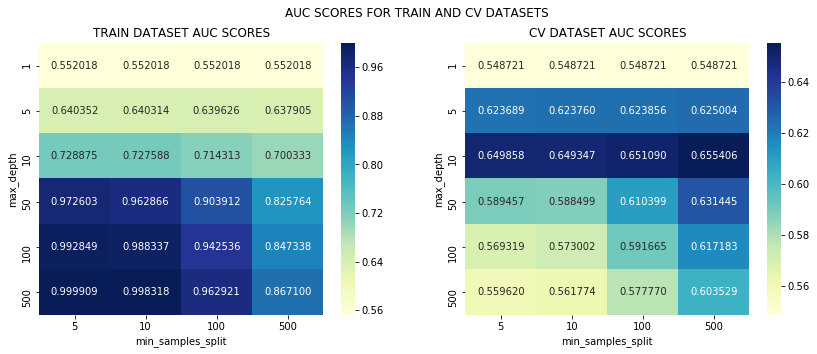

Best Parameters are: {'max_depth': 10, 'min_samples_split': 500}


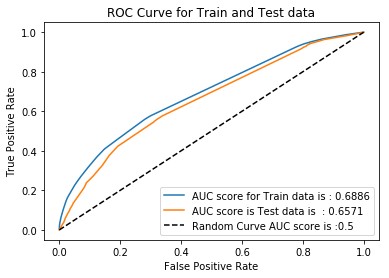

------------------------------------------------------------------------------------------
The Maximum value of 'TPR*(1-FPR)' is 0.40405725932837416 for 'THRESHOLD VALUE'of 0.478
------------------------------------------------------------------------------------------
CONFUSION MATRIX FOR TRAIN AND TEST DATASETS
+-------------------+---------------+
| Training Accuracy | Test Accuracy |
+-------------------+---------------+
|       0.595       |     0.588     |
+-------------------+---------------+


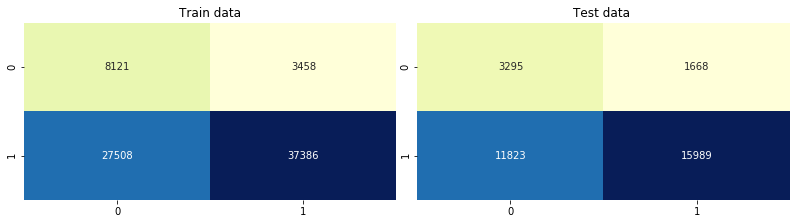

In [63]:
fp_indices=grid_search(model,hyper_param,X_train_bow,y_train,X_test_bow,y_test)

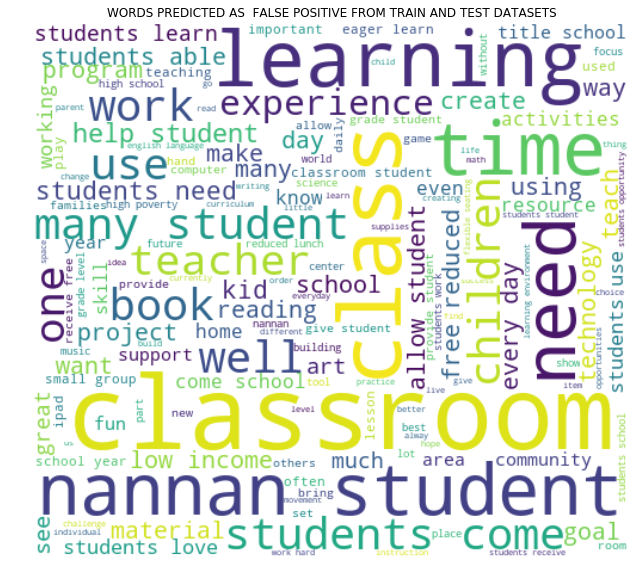

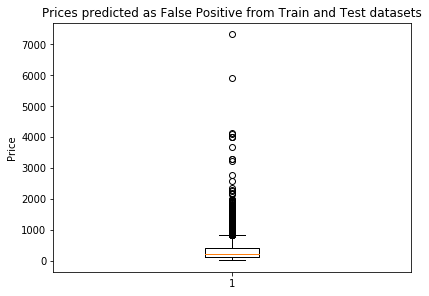

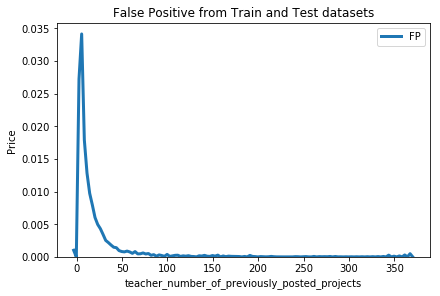

In [64]:
false_positive_plots(fp_indices,project_data)

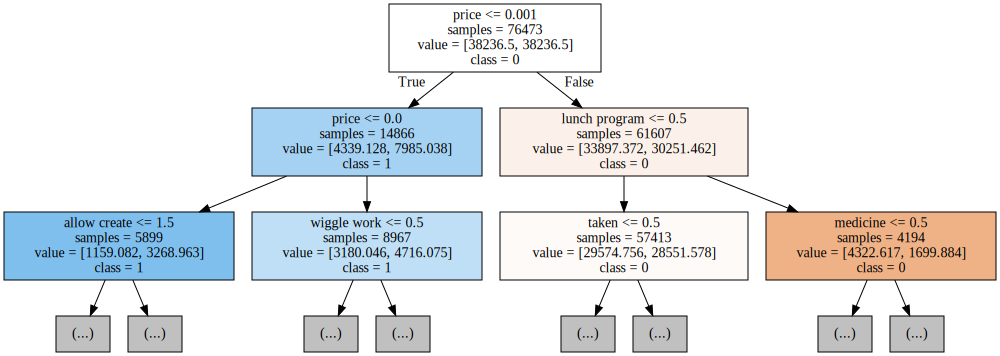

In [65]:
model.max_depth=10
model.min_samples_split=500
visualize_tree(model,X_train_bow,y_train,bow_features)

In [66]:
del X_train_bow
del X_test_bow

##  TF-IDF

###  project_title

In [67]:
tf_idf_vectorizer=TfidfVectorizer(ngram_range=(1,2),max_features=5000,min_df=10)
tf_idf_vectorizer.fit(X_train.project_title.values)
X_tr_title=tf_idf_vectorizer.transform(X_train.project_title.values)
X_te_title=tf_idf_vectorizer.transform(X_test.project_title.values)


tfidf_features=tuple(features)
tfidf_features=tfidf_features+tuple(tf_idf_vectorizer.get_feature_names())

### essay

In [68]:
tf_idf_vectorizer=TfidfVectorizer(ngram_range=(1,2),max_features=5000,min_df=10)
tf_idf_vectorizer.fit(X_train.essay.values)
X_tr_essay=tf_idf_vectorizer.transform(X_train.essay.values)
X_te_essay=tf_idf_vectorizer.transform(X_test.essay.values)

tfidf_features=tfidf_features+tuple(tf_idf_vectorizer.get_feature_names())


### project_resource_summary

In [69]:
tf_idf_vectorizer=TfidfVectorizer(ngram_range=(1,2),max_features=5000,min_df=10)
tf_idf_vectorizer.fit(X_train.project_resource_summary.values)
X_tr_resource=tf_idf_vectorizer.transform(X_train.project_resource_summary.values)
X_te_resource=tf_idf_vectorizer.transform(X_test.project_resource_summary.values)

tfidf_features=tfidf_features+tuple(tf_idf_vectorizer.get_feature_names())

In [70]:
X_train_tfidf=hstack((X_tr_vec,X_tr_title,X_tr_resource,X_tr_essay)).tocsr()
X_test_tfidf=hstack((X_te_vec,X_te_title,X_te_resource,X_te_essay)).tocsr()

In [71]:
print("TF-IDF:")
print("Training data set shape :",X_train_tfidf.shape)
print("Test data set shape :",X_test_tfidf.shape)

TF-IDF:
Training data set shape : (76473, 14826)
Test data set shape : (32775, 14826)


In [72]:
# Release the memory 
del X_tr_title
del X_te_title

del X_tr_resource
del X_te_resource

del X_tr_essay
del X_te_essay

### Find the right best depth and min number of points to split and build the Classifier 

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 11.7min finished


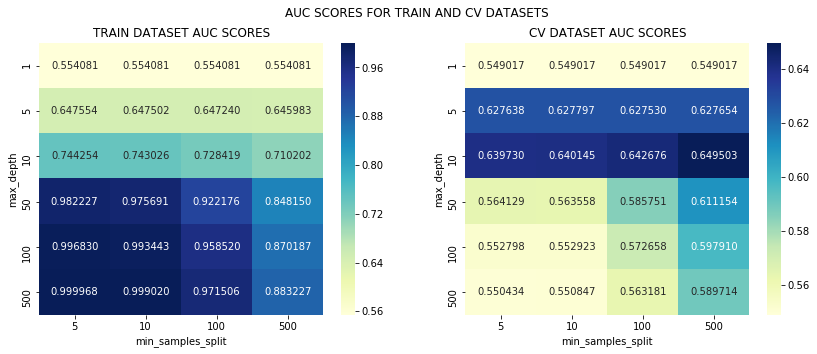

Best Parameters are: {'max_depth': 10, 'min_samples_split': 500}


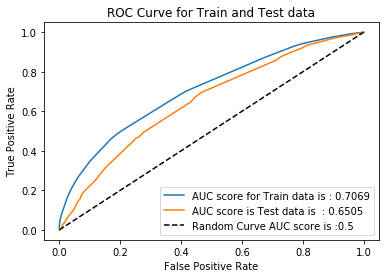

------------------------------------------------------------------------------------------
The Maximum value of 'TPR*(1-FPR)' is 0.4157298584563473 for 'THRESHOLD VALUE'of 0.488
------------------------------------------------------------------------------------------
CONFUSION MATRIX FOR TRAIN AND TEST DATASETS
+-------------------+---------------+
| Training Accuracy | Test Accuracy |
+-------------------+---------------+
|        0.65       |      0.63     |
+-------------------+---------------+


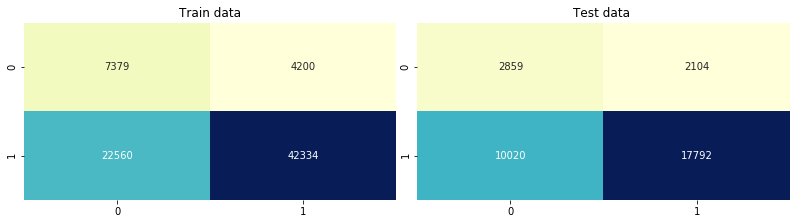

In [73]:
fp_indices=grid_search(model,hyper_param,X_train_tfidf,y_train,X_test_tfidf,y_test)

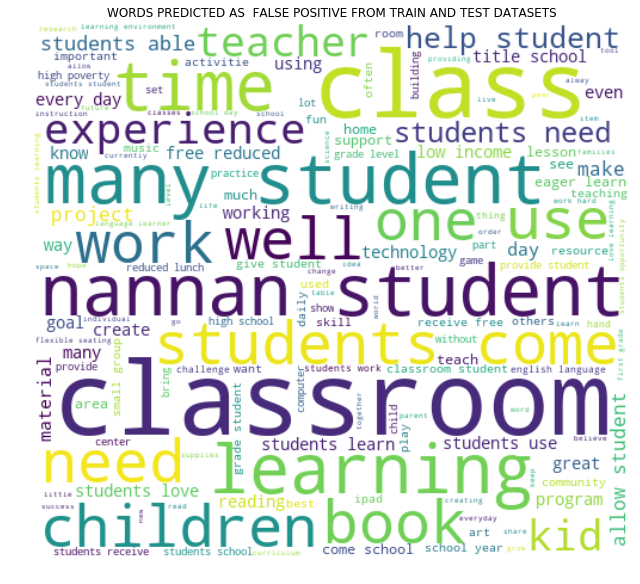

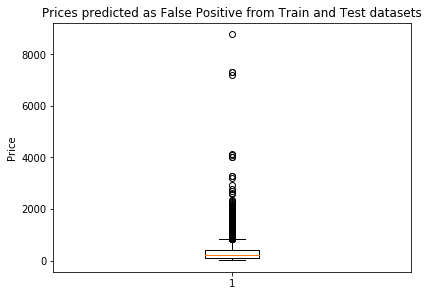

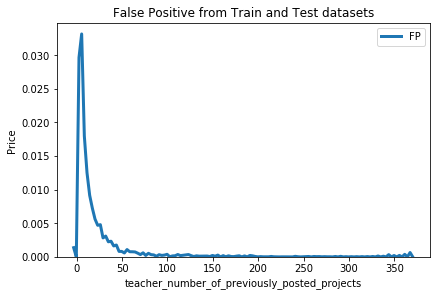

In [74]:
false_positive_plots(fp_indices,project_data)

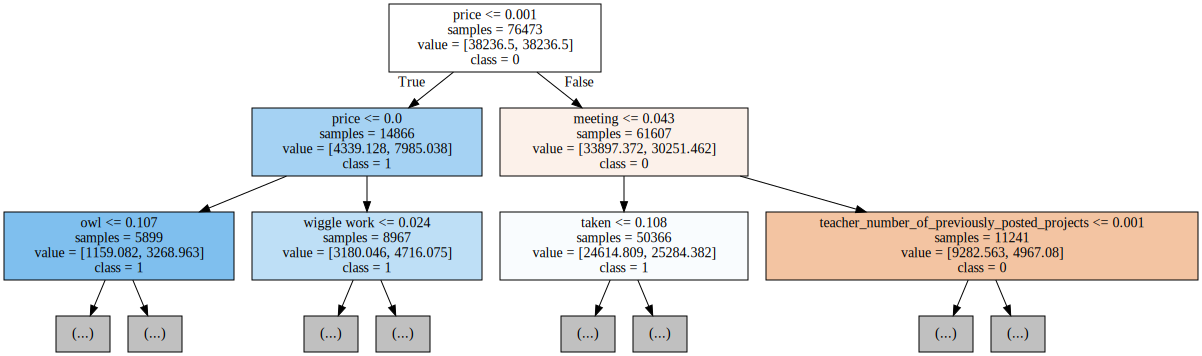

In [75]:
model.max_depth=10
model.min_samples_split=500
visualize_tree(model,X_train_tfidf,y_train,tfidf_features)

##  Select top 5000 features and build the Model

In [76]:
model.fit(X_train_tfidf,y_train)
fea_dict=dict()

for index,value in enumerate(model.feature_importances_):
    fea_dict[index]=value
    
sorted_dic=sorted(fea_dict.items(),key=lambda x:x[1],reverse=True)

#https://cmdlinetips.com/2019/07/how-to-slice-rows-and-columns-of-sparse-matrix-in-python/
X_train_5k=X_train_tfidf[:,[i[0] for i in (sorted_dic)[:5000]]]
X_test_5k=X_test_tfidf[:,[i[0] for i in (sorted_dic)[:5000]]]

In [77]:
print("TF-IDF after dimension reduction:")
print("Training data set shape :",X_train_5k.shape)
print("Test data set shape :",X_test_5k.shape)

TF-IDF after dimension reduction:
Training data set shape : (76473, 5000)
Test data set shape : (32775, 5000)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.6min finished


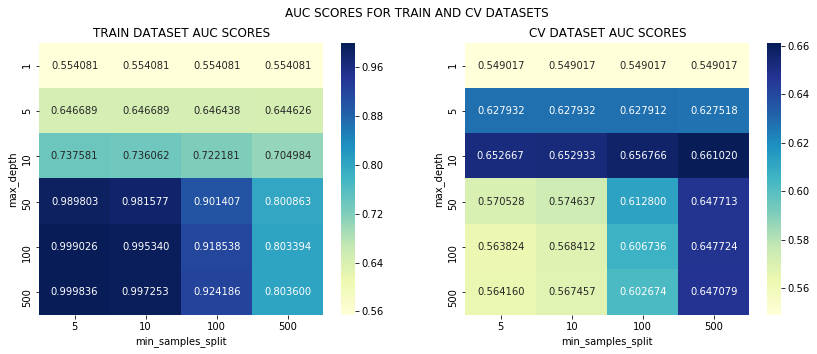

Best Parameters are: {'max_depth': 10, 'min_samples_split': 500}


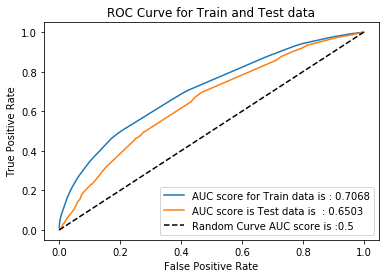

------------------------------------------------------------------------------------------
The Maximum value of 'TPR*(1-FPR)' is 0.4156978039506881 for 'THRESHOLD VALUE'of 0.488
------------------------------------------------------------------------------------------
CONFUSION MATRIX FOR TRAIN AND TEST DATASETS
+-------------------+---------------+
| Training Accuracy | Test Accuracy |
+-------------------+---------------+
|        0.65       |      0.63     |
+-------------------+---------------+


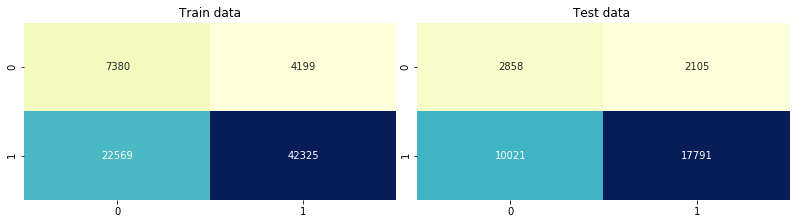

In [78]:
fp_indices=grid_search(model,hyper_param,X_train_5k,y_train,X_test_5k,y_test)

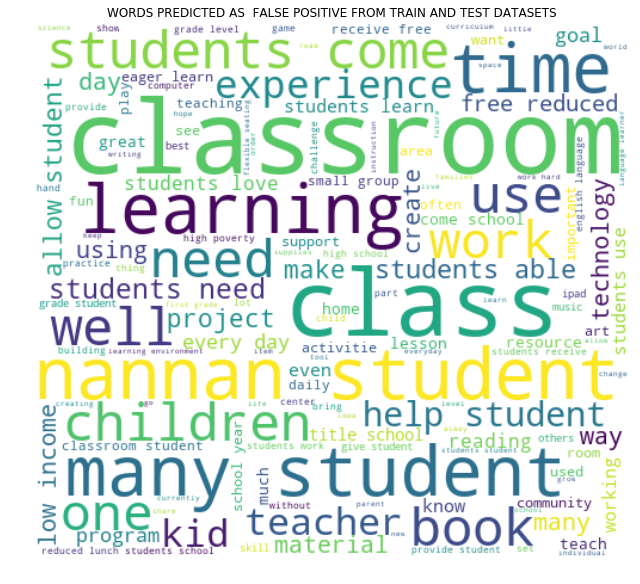

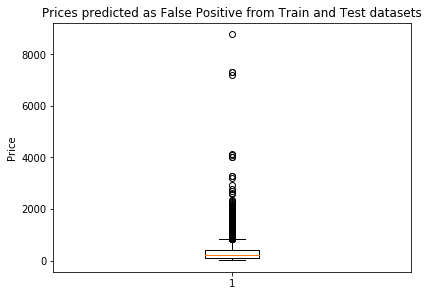

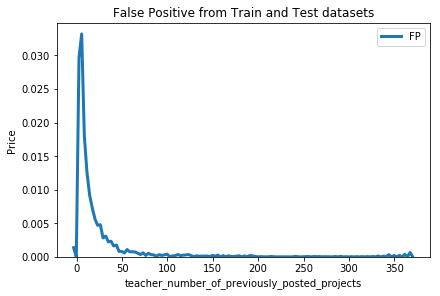

In [79]:
false_positive_plots(fp_indices,project_data)

In [80]:
del X_train_tfidf
del X_test_tfidf

del X_train_5k
del X_test_5k

## Avg W2V

In [81]:
# stronging variables into pickle files python:
#http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [82]:
# average Word2Vec
def avg_w2vec(glove_words,feature_values):
    # compute average word2vec for each review.
    avg_w2v_vec = []; # the avg-w2v for each sentence/review is stored in this list
    
    for sent in tqdm(feature_values): # for each review/sentence
        sent_vec = np.zeros(300) # as word vectors are of zero length 300, you might need to 
        #change this to 300 if you use google's w2v
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sent.split(): # for each word in a review/sentence
            if word in glove_words:
                sent_vec += model[word]
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        avg_w2v_vec.append(sent_vec)
       
    print(len(avg_w2v_vec),len(avg_w2v_vec[0]))
    return avg_w2v_vec

###  project_title

In [83]:
X_tr_title=avg_w2vec(glove_words,X_train.project_title.values)

100%|██████████| 76473/76473 [00:01<00:00, 67079.16it/s]

76473 300


In [84]:
X_te_title=avg_w2vec(glove_words,X_test.project_title.values)

100%|██████████| 32775/32775 [00:00<00:00, 67389.17it/s]

32775 300


### essay

In [85]:
X_tr_essay=avg_w2vec(glove_words,X_train.essay.values)

100%|██████████| 76473/76473 [00:20<00:00, 3792.88it/s]

76473 300


In [86]:
X_te_essay=avg_w2vec(glove_words,X_test.essay.values)

100%|██████████| 32775/32775 [00:08<00:00, 3828.50it/s]

32775 300


###  project_resource_summary

In [87]:
X_tr_resource=avg_w2vec(glove_words,X_train.project_resource_summary.values)

100%|██████████| 76473/76473 [00:02<00:00, 32839.59it/s]

76473 300


In [88]:
X_te_resource=avg_w2vec(glove_words,X_test.project_resource_summary.values)

100%|██████████| 32775/32775 [00:00<00:00, 33618.06it/s]

32775 300


In [89]:
X_train_awv=hstack((X_tr_vec,X_tr_title,X_tr_essay,X_tr_resource))
X_test_awv=hstack((X_te_vec,X_te_title,X_te_essay,X_te_resource))

In [90]:
print("Average Word 2 vector:")
print("Training data set shape :",X_train_awv.shape)
print("Test data set shape :",X_test_awv.shape)

Average Word 2 vector:
Training data set shape : (76473, 1001)
Test data set shape : (32775, 1001)


In [91]:
# Release the memory 
del X_tr_title
del X_te_title

del X_tr_resource
del X_te_resource

del X_tr_essay
del X_te_essay

### Find the right best depth and min number of points to split and build the Classifier 

100%|██████████| 6/6 [1:12:15<00:00, 869.14s/it]


{'max_depth': 5, 'best_score': 0.6285, 'min_samples_split': 500}


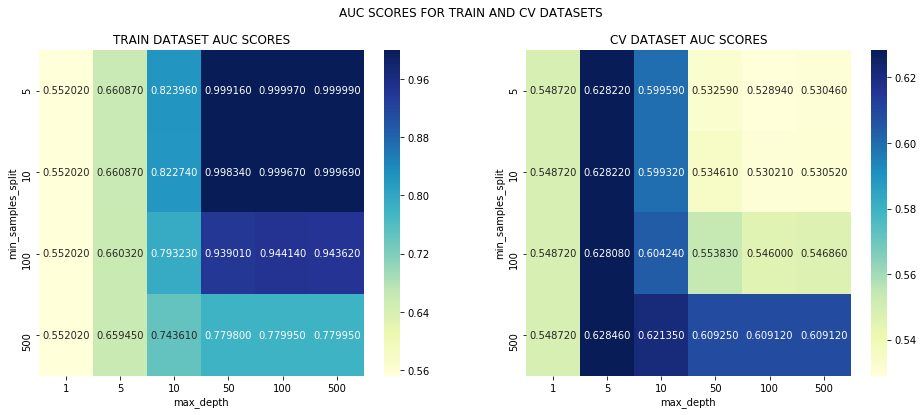

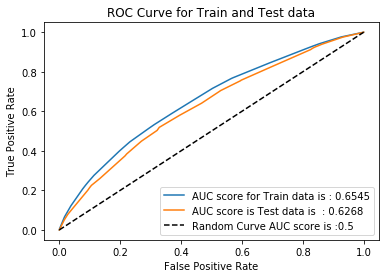

------------------------------------------------------------------------------------------
The Maximum value of 'TPR*(1-FPR)' is 0.3713603034420095 for 'THRESHOLD VALUE'of 0.494
------------------------------------------------------------------------------------------
CONFUSION MATRIX FOR TRAIN AND TEST DATASETS
+-------------------+---------------+
| Training Accuracy | Test Accuracy |
+-------------------+---------------+
|       0.596       |     0.583     |
+-------------------+---------------+


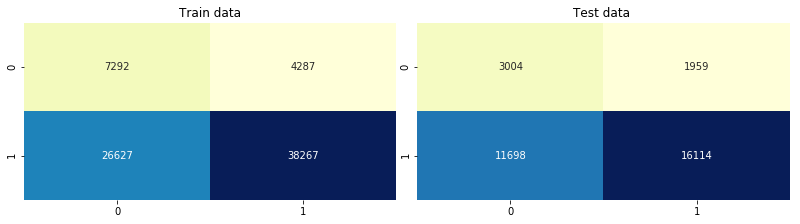

In [92]:
fp_indices=cross_validate_scores(model,hyper_param,X_train_awv,y_train,X_test_awv,y_test)

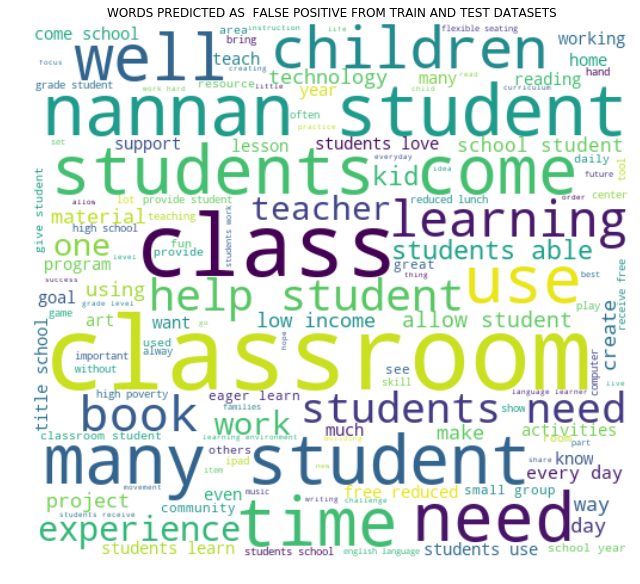

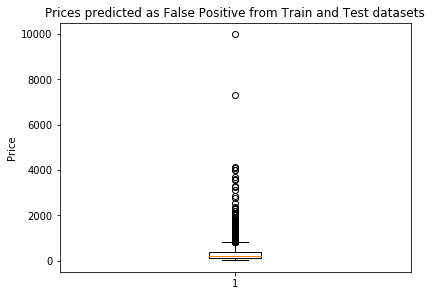

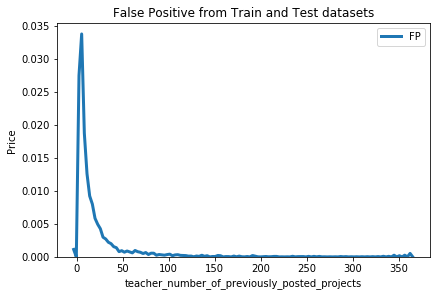

In [93]:
false_positive_plots(fp_indices,project_data)

In [94]:
del X_train_awv
del X_test_awv

## TF-IDF AW2V

In [95]:
def tfidf_avgw2v(glove_words,tfidf_words,feature_values):
    processed_tfidf_w2v= []; # the avg-w2v for TITLE is stored in this list
    for sentence in tqdm(feature_values): # for each TITLE
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the TITLE
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and 
                #the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) 
                # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        processed_tfidf_w2v.append(vector)

    print(len(processed_tfidf_w2v))
    print(len(processed_tfidf_w2v[0]))
    
    return processed_tfidf_w2v

### essay

In [96]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train.essay.values)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [97]:
X_tr_essay= tfidf_avgw2v(glove_words,tfidf_words,X_train.essay.values)

100%|██████████| 76473/76473 [02:23<00:00, 533.27it/s]

76473
300


In [98]:
X_te_essay= tfidf_avgw2v(glove_words,tfidf_words,X_test.essay.values)


100%|██████████| 32775/32775 [01:00<00:00, 543.41it/s]

32775
300


### project_title

In [99]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train.project_title.values)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [100]:
X_tr_title=tfidf_avgw2v(glove_words,tfidf_words,X_train.project_title.values)

100%|██████████| 76473/76473 [00:03<00:00, 24206.47it/s]

76473
300


In [101]:
X_te_title=tfidf_avgw2v(glove_words,tfidf_words,X_test.project_title.values)

100%|██████████| 32775/32775 [00:01<00:00, 24037.19it/s]

32775
300


### project_resource_summary

In [102]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train.project_resource_summary.values)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [103]:
X_tr_resource=tfidf_avgw2v(glove_words,tfidf_words,X_train.project_resource_summary.values)

100%|██████████| 76473/76473 [00:08<00:00, 9265.39it/s]

76473
300


In [104]:
X_te_resource=tfidf_avgw2v(glove_words,tfidf_words,X_test.project_resource_summary.values)

100%|██████████| 32775/32775 [00:03<00:00, 9209.77it/s]

32775
300


In [105]:
X_train_tfidfawv=hstack((X_tr_vec,X_tr_title,X_tr_essay,X_tr_resource)).tocsr()
X_test_tfidfawv=hstack((X_te_vec,X_te_title,X_te_essay,X_te_resource)).tocsr()

In [106]:
print("Average Word 2 vector:")
print("Training data set shape :",X_train_tfidfawv.shape)
print("Test data set shape :",X_test_tfidfawv.shape)

Average Word 2 vector:
Training data set shape : (76473, 1001)
Test data set shape : (32775, 1001)


In [107]:
# Release the memory 
del X_tr_title
del X_te_title

del X_tr_resource
del X_te_resource

del X_tr_essay
del X_te_essay

### Find the right best depth and min number of points to split and build the Classifier 

100%|██████████| 6/6 [1:13:33<00:00, 882.42s/it]


{'max_depth': 5, 'best_score': 0.6295, 'min_samples_split': 5}


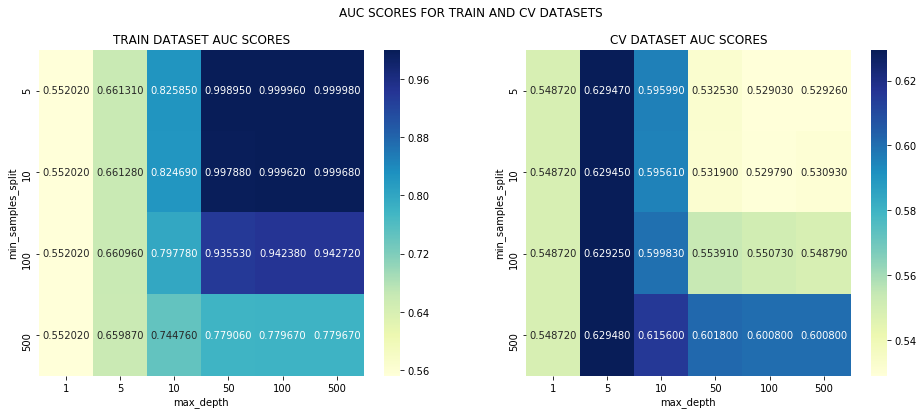

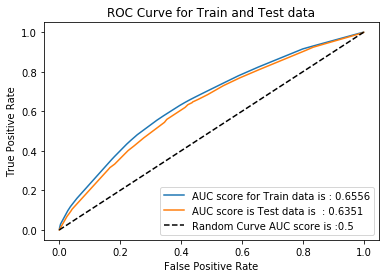

------------------------------------------------------------------------------------------
The Maximum value of 'TPR*(1-FPR)' is 0.3804545217644624 for 'THRESHOLD VALUE'of 0.495
------------------------------------------------------------------------------------------
CONFUSION MATRIX FOR TRAIN AND TEST DATASETS
+-------------------+---------------+
| Training Accuracy | Test Accuracy |
+-------------------+---------------+
|       0.626       |     0.615     |
+-------------------+---------------+


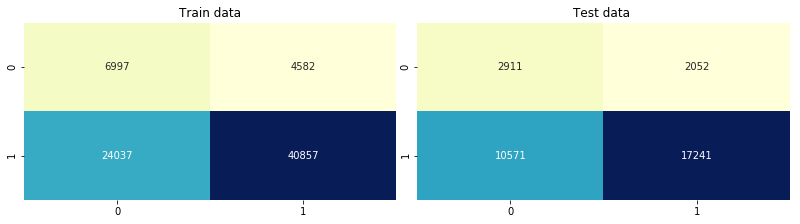

In [108]:
fp_indices=cross_validate_scores(model,hyper_param,X_train_tfidfawv,y_train,X_test_tfidfawv,y_test)

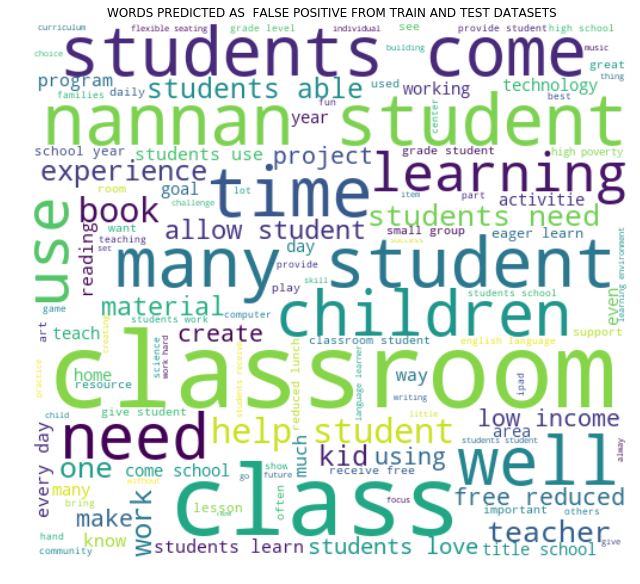

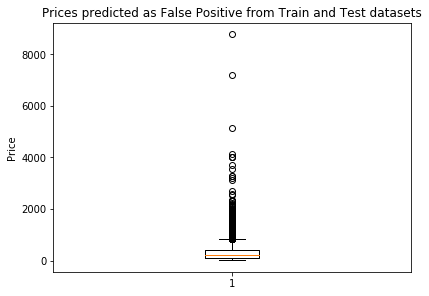

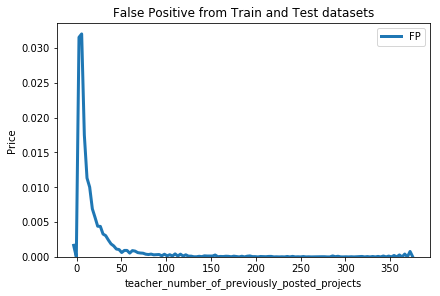

In [109]:
false_positive_plots(fp_indices,project_data)

In [111]:
del X_train_tfidfawv
del X_test_tfidfawv

## Summary

In [110]:
summary_table = PrettyTable()
summary_table.hrules=True

summary_table.field_names=['Model',"Vectorizer", "Cv method","depth",'min_samples',"Train AUC", "Test AUC"]
summary_table.add_row(['DecisionTree',"BOW", 'Gridsearch', '10', '500',.6886,.6571])
summary_table.add_row(['DecisionTree',"TF-IDF", 'Gridsearch', '10', '500',.7069,.6505])
summary_table.add_row(['DecisionTree',"TF-IDF(5000)", 'Gridsearch', '10', '500',.7068,.6503])
summary_table.add_row(['DecisionTree',"AVG W2V", 'Cross_validate', '5', '500',.6545,.6268])
summary_table.add_row(['DecisionTree',"TF-IDF AVGW2V", 'Cross_validate','5', '500',.6556,.6351])

summary_table.sortby='Test AUC'
summary_table.reversesort=True
print(summary_table)


+--------------+---------------+----------------+-------+-------------+-----------+----------+
|    Model     |   Vectorizer  |   Cv method    | depth | min_samples | Train AUC | Test AUC |
+--------------+---------------+----------------+-------+-------------+-----------+----------+
| DecisionTree |      BOW      |   Gridsearch   |   10  |     500     |   0.6886  |  0.6571  |
+--------------+---------------+----------------+-------+-------------+-----------+----------+
| DecisionTree |     TF-IDF    |   Gridsearch   |   10  |     500     |   0.7069  |  0.6505  |
+--------------+---------------+----------------+-------+-------------+-----------+----------+
| DecisionTree |  TF-IDF(5000) |   Gridsearch   |   10  |     500     |   0.7068  |  0.6503  |
+--------------+---------------+----------------+-------+-------------+-----------+----------+
| DecisionTree | TF-IDF AVGW2V | Cross_validate |   5   |     500     |   0.6556  |  0.6351  |
+--------------+---------------+----------------+-